<p Style="text-align:center;font-weight:900;font-size:30px">Summer Heat Wave Detection and Mobile Alert</p>

**1 . Importing the necessary modules**

In [28]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
print("Imported all the necessary libraries")

Imported all the necessary libraries


**2. Importing the dataset**

In [29]:
Data_Url="./Data.csv"
Weather_Data=pd.read_csv(Data_Url,parse_dates=['Date'])
print("Data Imported")

Data Imported


**3 . Data Preprocessing**

In [30]:
Weather_Data['Year'] = Weather_Data['Date'].dt.year
Weather_Data['Month'] = Weather_Data['Date'].dt.month
Weather_Data['Day'] = Weather_Data['Date'].dt.day
Weather_Data['Heatwave']=Weather_Data['Temp']>30
print("Data Ready for Analysis\n\n\n")
Weather_Data.head()

Data Ready for Analysis





,Unnamed: 0,Date,Temp,Year,Month,Day,Heatwave
0,0,1981-01-01,20.7,1981,1,1,False
1,1,1981-01-02,17.9,1981,1,2,False
2,2,1981-01-03,18.8,1981,1,3,False
3,3,1981-01-04,14.6,1981,1,4,False
4,4,1981-01-05,15.8,1981,1,5,False


**4 . Data Analysis**

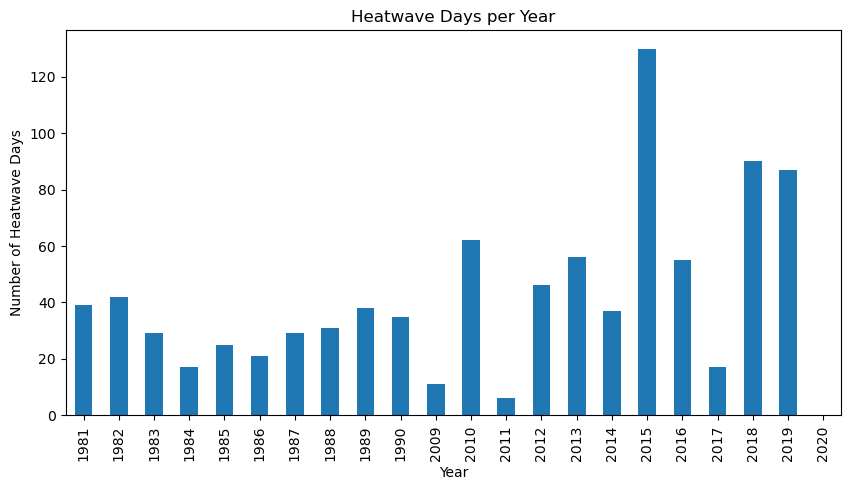

In [31]:
heatwave_days_per_year = Weather_Data.groupby('Year')['Heatwave'].sum()
heatwave_days_per_year.plot(kind='bar', figsize=(10, 5), title='Heatwave Days per Year')
plt.xlabel('Year')
plt.ylabel('Number of Heatwave Days')
plt.show()

**5 . Model Importing and Training**

In [32]:
features = Weather_Data[['Year', 'Month', 'Day', 'Temp']]
target = Weather_Data['Heatwave']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=3)

#Create a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**6 . Prediction**

In [33]:
"""
Please give the input in the following format
2D Array [[Year,Month,Day,Temp]]
Uncomment the below 2 lines to give the input diretly or you can feel free to use the input method used below 
"""
# Pred=model.predict([[1981, 6, 1, 35]])
# print(Pred)

'''Input Method'''
Year=int(input("Enter the Year: "))
Month=int(input("Enter the Month(in numbers): "))
Day=int(input("Enter the Day: "))
Temp=float(input("Enter the Temperature(float to be precise): "))
Pred=model.predict([[Year,Month,Day,Temp]])
print("HeatWave Detected" if (Pred[0]) else "No HeatWave Detected")

No HeatWave Detected


`SendMobileAlert()` <span style="color:orange"> - Module Declaration</span>

In [34]:
def SendMobileAlert():    
    token = "PRIVATEKEY"
    url = f"https://api.telegram.org/bot{token}"
    params = {"chat_id": "CHATID", "text": "Heat Wave has been Detected ☀️ . Please take necessary precautions."}
    r = requests.get(url + "/sendMessage", params=params)

**7 . Sending the alert**

In [ ]:
if(Pred[0]):
    SendMobileAlert()
else:
    print("Thank you for using our service")